Lending Club Case Study -

Group Members:
Pridhvi Chinta
K.V. Vamsi Krishna

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#read the dataset and check the first five rows of  loan
loan = pd.read_csv("loan.csv")
loan.head(5)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [3]:
#backup the orginal
orginal_loan=loan

In [4]:
#checking the shape
loan.shape

(39717, 111)

In [5]:
#getting basic info of the files
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#getting the statical data of all the numberic data
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,...,NaN,NaN,NaN,NaN,0.043,0.000,NaN,NaN,NaN,NaN
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,...,NaN,NaN,NaN,NaN,0.204,0.000,NaN,NaN,NaN,NaN
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,NaN,NaN,NaN,NaN,2.000,0.000,NaN,NaN,NaN,NaN


In [7]:
#checking the null values 
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:

missing_data=loan.isnull().sum()/len(loan.index)*100
missing_data

id                             0.000
member_id                      0.000
loan_amnt                      0.000
funded_amnt                    0.000
funded_amnt_inv                0.000
                               ...  
tax_liens                      0.098
tot_hi_cred_lim              100.000
total_bal_ex_mort            100.000
total_bc_limit               100.000
total_il_high_credit_limit   100.000
Length: 111, dtype: float64

In [9]:
#getting the name of the fields with more 75% null vales
colu_name=missing_data[missing_data>75].index

In [10]:
colu_name


Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [11]:

#removing the null field with more than 75%
loan=loan.drop(colu_name,axis=1)
loan.shape

(39717, 55)

In [12]:
missing_data=loan.isnull().sum()/len(loan.index)*100
missing_data[missing_data>0]
#getting the all null value perentage

emp_title                     6.191
emp_length                    2.707
desc                         32.581
title                         0.028
mths_since_last_delinq       64.662
revol_util                    0.126
last_pymnt_d                  0.179
last_credit_pull_d            0.005
collections_12_mths_ex_med    0.141
chargeoff_within_12_mths      0.141
pub_rec_bankruptcies          1.755
tax_liens                     0.098
dtype: float64

In [13]:
#getting the names of the null value 
colu_name=missing_data[missing_data>0].index

In [14]:
#display the unqiue values of 
column_list = loan.columns.values.tolist()
for column_name in colu_name:
    
    print(column_name,'\t',len(loan[column_name].unique()),)
    

emp_title 	 28821
emp_length 	 12
desc 	 26528
title 	 19616
mths_since_last_delinq 	 96
revol_util 	 1090
last_pymnt_d 	 102
last_credit_pull_d 	 107
collections_12_mths_ex_med 	 2
chargeoff_within_12_mths 	 2
pub_rec_bankruptcies 	 4
tax_liens 	 2


In [15]:
#displaying the value and number of unqiue value with less 50 unqiue
for column_name in colu_name:
    if len(loan[column_name].unique())<50:
        print(column_name,'\t',len(loan[column_name].unique()),'\t',loan[column_name].unique())

emp_length 	 12 	 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
collections_12_mths_ex_med 	 2 	 [ 0. nan]
chargeoff_within_12_mths 	 2 	 [ 0. nan]
pub_rec_bankruptcies 	 4 	 [ 0.  1.  2. nan]
tax_liens 	 2 	 [ 0. nan]


In [16]:
#droping the 0 and nan values fields
loan=loan.drop(['collections_12_mths_ex_med','tax_liens','chargeoff_within_12_mths'],axis=1)
loan.shape

(39717, 52)

In [17]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,0.000,0.000,Jan-15,171.620,May-16,1,INDIVIDUAL,0,0,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,117.080,1.110,Apr-13,119.660,Sep-13,1,INDIVIDUAL,0,0,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,0.000,0.000,Jun-14,649.910,May-16,1,INDIVIDUAL,0,0,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,0.000,0.000,Jan-15,357.480,Apr-16,1,INDIVIDUAL,0,0,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,0.000,0.000,May-16,67.790,May-16,1,INDIVIDUAL,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.000,36 months,8.07%,78.420,A,A4,...,0.000,0.000,Jul-10,80.900,Jun-10,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.000,36 months,10.28%,275.380,C,C1,...,0.000,0.000,Jul-10,281.940,Jul-10,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.000,36 months,8.07%,156.840,A,A4,...,0.000,0.000,Apr-08,0.000,Jun-07,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.000,36 months,7.43%,155.380,A,A2,...,0.000,0.000,Jan-08,0.000,Jun-07,1,INDIVIDUAL,0,0,NaN


In [18]:
#checking the null field
missing_data=loan.isnull().sum()/len(loan.index)*100
missing_data[missing_data>0]

emp_title                 6.191
emp_length                2.707
desc                     32.581
title                     0.028
mths_since_last_delinq   64.662
revol_util                0.126
last_pymnt_d              0.179
last_credit_pull_d        0.005
pub_rec_bankruptcies      1.755
dtype: float64

In [19]:
#removing the  null row from field less 10% null values
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [20]:
#checking the shapes
loan.shape

(36548, 52)

In [21]:
#checking the null percentage
missing_data=loan.isnull().sum()/len(loan.index)*100
missing_data[missing_data>0]

desc                     33.009
title                     0.025
mths_since_last_delinq   65.705
revol_util                0.126
last_pymnt_d              0.175
dtype: float64

In [22]:
#checking the unqiu valeus of all the columns
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
mths_since_last_delinq        95
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    864
funded_amnt                 1025
out_prncp 

In [23]:
#display the column of the 1 unqiue value fiedl and dropping the  field from the  table 
column_list = loan.columns.values.tolist()
for column_name in column_list:
    if len(loan[column_name].unique())==1:
        print(column_name,'\t',len(loan[column_name].unique()),'\t',loan[column_name].unique())
        loan=loan.drop(column_name,axis=1)

pymnt_plan 	 1 	 ['n']
initial_list_status 	 1 	 ['f']
policy_code 	 1 	 [1]
application_type 	 1 	 ['INDIVIDUAL']
acc_now_delinq 	 1 	 [0]
delinq_amnt 	 1 	 [0]


In [24]:
loan.shape

(36548, 46)

In [25]:
#checking the loan status count as the analysis will be  based on the status
loan.loan_status.value_counts()

Fully Paid     30463
Charged Off     5019
Current         1066
Name: loan_status, dtype: int64

In [26]:
#As the  Current cant be consider as default or non default as they are still paying so will be removing from the  analysis
loan=loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [27]:
loan.shape


(35482, 46)

In [28]:
#getting the statical data from the field
loan.describe(percentiles =[ 0.80 , 0.95 ])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,...,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000,35482.000
mean,684091.674,852729.181,11120.439,10854.509,10412.349,323.716,69024.372,13.397,0.146,0.868,...,0.000,11990.953,11515.258,9741.142,2151.899,1.304,96.607,12.155,2805.287,0.042
std,201199.353,252664.839,7327.883,7071.378,6968.698,207.178,63925.524,6.639,0.494,1.065,...,0.000,8821.932,8676.567,7004.145,2409.394,7.081,695.223,143.311,4516.682,0.201
min,55742.000,112493.000,500.000,500.000,0.000,16.080,4000.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,660687.500,844689.500,10000.000,9600.000,9000.000,280.010,60000.000,13.500,0.000,1.000,...,0.000,9831.873,9372.930,8000.000,1328.920,0.000,0.000,0.000,598.215,0.000
80%,865350.000,1078075.600,16000.000,16000.000,15000.000,480.370,90000.000,19.790,0.000,2.000,...,0.000,18044.239,17449.376,15000.000,3235.074,0.000,0.000,0.000,4786.928,0.000
95%,1039014.750,1268664.550,25000.000,25000.000,24570.311,752.839,140000.000,23.830,1.000,3.000,...,0.000,29767.613,29150.050,24600.000,6937.714,0.058,376.242,5.289,12454.002,0.000
max,1077430.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,0.000,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


In [29]:
#removing the outlier from annual_inc and  Loan_amnt
loan=loan[~(loan['annual_inc']>(np.quantile(loan['annual_inc'],0.95)))]
loan=loan[~(loan['annual_inc']<(np.quantile(loan['annual_inc'],0.05)))]

loan=loan[~(loan['loan_amnt']>(np.quantile(loan['loan_amnt'],0.95)))]
loan=loan[~(loan['loan_amnt']<(np.quantile(loan['loan_amnt'],0.05)))]

In [30]:
loan.shape

(29755, 46)

In [31]:
#deriving  the year and months  fields from the  issue_d
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_month'] =loan['issue_d'].dt.month
loan['issue_year'] =loan['issue_d'].dt.year
loan[['issue_year','issue_month']]

,issue_year,issue_month
1,2011,12
3,2011,12
5,2011,12
6,2011,12
7,2011,12
...,...,...
39551,2007,12
39562,2007,11
39623,2007,10
39666,2007,8


In [32]:
#checking the int_rate
loan['int_rate']

1        15.27%
3        13.49%
5         7.90%
6        15.96%
7        18.64%
          ...  
39551    10.91%
39562    10.28%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 29755, dtype: object

In [33]:
#cleaning the int_rate and converting into float value
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

In [34]:
#
loan['int_rate_bin']=round(loan['int_rate'])

In [35]:
#cheking the percentage based on the loan_status
loan['loan_status'].value_counts(normalize=True)*100

Fully Paid    86.177
Charged Off   13.823
Name: loan_status, dtype: float64

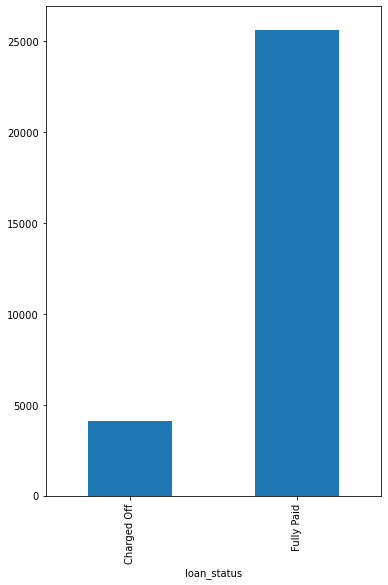

In [36]:
#plottng the bar graph of loan status
plt.figure(figsize=(6,9))
plt_data = loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [37]:
loan.groupby('loan_status').total_pymnt.sum() - loan.groupby('loan_status').loan_amnt.sum()


loan_status
Charged Off   -20779721.223
Fully Paid     46056365.523
dtype: float64

In [38]:
#getting the  sum of the  loans of the loan status
loan.groupby('loan_status').loan_amnt.sum()

loan_status
Charged Off     48050300
Fully Paid     273911450
Name: loan_amnt, dtype: int64

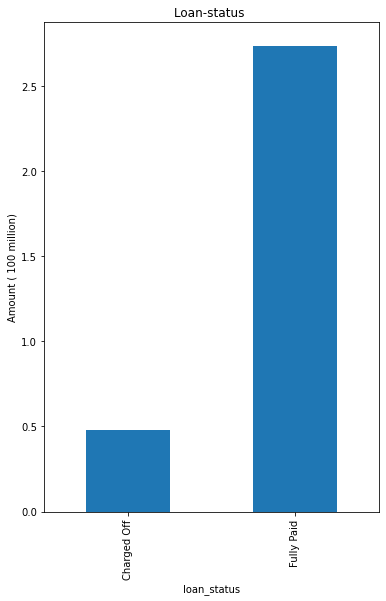

In [39]:
#ploting the sum of the loan by loan status
plt.figure(figsize=(6,9))
plt_data = loan.groupby('loan_status').loan_amnt.sum().apply(lambda x :x/100000000).plot.bar()
plt.title('Loan-status ')
plt.ylabel('Amount ( 100 million)')

plt.show()

In [40]:
#getting the  statitical data of loan ammount
loan['loan_amnt'].describe()

count   29755.000
mean    10820.425
std      5878.281
min      2500.000
25%      6000.000
50%     10000.000
75%     15000.000
max     25000.000
Name: loan_amnt, dtype: float64

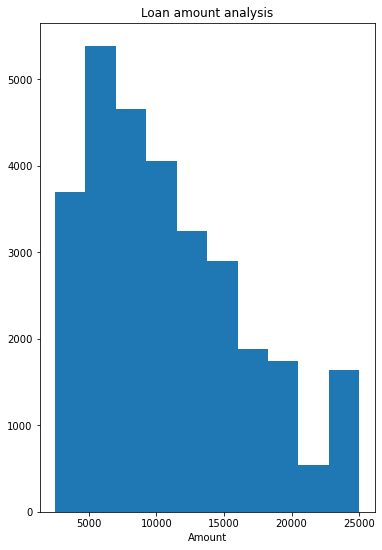

In [41]:
#plotting the histogram of the  loan amount
plt.figure(figsize=(6,9))
plt.hist(loan['loan_amnt'])
plt.title('Loan amount analysis')
plt.xlabel('Amount')
plt.show()

Observation :
Loan of 5K to 10K is  taken more than comparing to other amount
   



C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


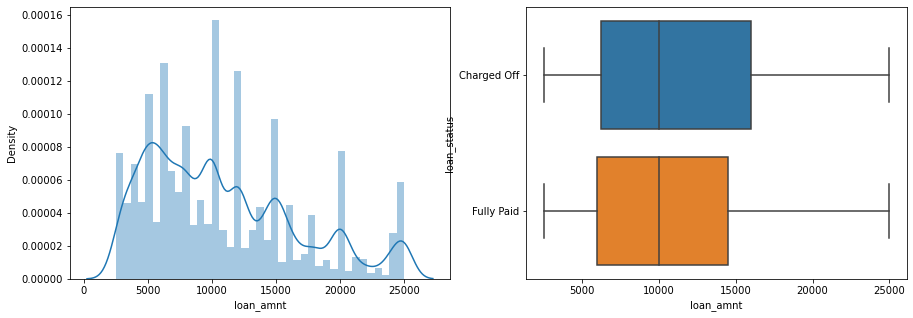

In [42]:
#getting the hist and box plot of the loan amount
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(loan['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan['loan_amnt'], y=loan['loan_status'], data=loan)
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

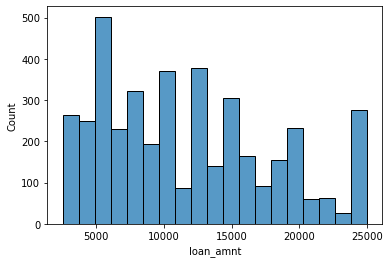

In [72]:
sns.histplot(data=loan[loan['loan_status']=='Charged Off']['loan_amnt'])

In [43]:
#geting the sum and count  of the loan amount by purpose
loan.groupby('purpose')['loan_amnt'].agg(('sum' ,'count'))

,sum,count
purpose,,
car,8366150,1176
credit_card,45605000,4054
debt_consolidation,176209700,14698
educational,1548875,191
home_improvement,21259325,2083
house,3177950,282
major_purchase,13234400,1590
medical,4274525,501
moving,2739900,380


In [44]:
loan.groupby('purpose')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,1176.000,7114.073,3752.215,2500.000,4500.000,6000.000,9000.000,25000.000
credit_card,4054.000,11249.383,5659.937,2500.000,7000.000,10000.000,15000.000,25000.000
debt_consolidation,14698.000,11988.686,5878.493,2500.000,7200.000,11000.000,15600.000,25000.000
educational,191.000,8109.293,4992.605,2500.000,5000.000,6450.000,10000.000,25000.000
home_improvement,2083.000,10206.109,5901.154,2500.000,5262.500,9000.000,14000.000,25000.000
house,282.000,11269.326,5949.872,2500.000,6000.000,10000.000,15000.000,25000.000
major_purchase,1590.000,8323.522,5104.412,2500.000,4900.000,7000.000,10000.000,25000.000
medical,501.000,8531.986,5253.667,2500.000,4800.000,6800.000,11000.000,25000.000
moving,380.000,7210.263,4743.381,2500.000,4000.000,5600.000,9650.000,25000.000


In [45]:
#Writing a function for plot and  displaying the  data analysis
#plot_data has 3 input(dataframe_name,column_name,Data_type)
#If the data is categorical then it is d if numberical then n

In [46]:
def plot_data(df, col,dt_type):
    print('\t\t\t \t\t\t\t'+col.upper()+' Analysis \n')
    if dt_type=='d':
        #display the count  of load 
        print('total Count \n')
        print(df[col].value_counts())
        print('Percentage data \n')
        print(df[col].value_counts(normalize=True)*100)
        print('Total loan sum\n')
        print(loan.groupby(col).loan_amnt.sum().apply(lambda x :x/1000).sort_values(ascending=False))
        plt.figure(figsize=(20,10))
        plt.subplot(2, 1, 1)
        #plot the percentage of the loan taken  by the col_name(categorical data)
        plt_data = (df[col].value_counts(normalize=True)*100).sort_values(ascending=False).plot.bar()
        #sns.barplot(x=col,y=df[col].value_counts(normalize=True)*100,data=df)
        plt.title(col.upper()+' Analysis')
        plt.ylabel('count (%)')
        #plt.show() 
        plt.figure(figsize=(20,10))
        plt.subplot(2, 1, 2)
        #display the loan amount taken by each category
        plt_data = loan.groupby(col).loan_amnt.sum().apply(lambda x :x/1000).sort_values(ascending=False).plot.bar()
        #sns.barplot(data=(df[col].value_counts(normalize=True)*100).sort_values(ascending=False))
        plt.title(col.upper()+' loan amt Analysis')
        plt.ylabel('Amount (in 1k)')
        plt.show()
        plt.figure(figsize=(20,10))
       # plt.subplot(2, 1, 1)
    #display the plot of percentage of catogorical between loan status
        plt_data = (loan.groupby(col).loan_status.value_counts(normalize=True)*100).unstack().plot.bar()
        plt.title(col.upper()+' Analysis(loan status wise) ')
        plt.ylabel('count')
        plt.show()
        plt.figure(figsize=(20,10))
        #plt.subplot(2,1, 2)
    #display the percent of loan taken with loan status as Charge_off
        plt_data = (loan[loan['loan_status']=='Charged Off'][col].value_counts(normalize=True)*100).plot.bar()
        plt.title(col.upper()+' Analysis(only Charge off) ')
        plt.ylabel('count')
        plt.show()
    elif dt_type=='n':
        #display the statical data of the numberical field
        print(loan.groupby('loan_status')[col].describe())
        print('\nMedian of the '+col+' variable \n',loan.groupby('loan_status')[col].median())
        plt.figure(figsize=(20,10))
        plt.subplot(2, 1, 1)
        #plot the histogram
        sns.histplot(data=df[col])
        #plt.show()
        plt.figure(figsize=(20,10))
        plt.subplot(2, 1, 2)
        #plot the boxplot of column  between the status
        sns.boxplot(x=df[col], y=df['loan_status'], data=df)
        plt.show()
        plt.figure(figsize=(20,10))
        #plot the sum of column  between the status
        plt_data = loan.groupby('loan_status')[col].sum().apply(lambda x :x/1000).plot.bar()
        plt.title(col.upper()+' Analysis(loan status wise) ')
        plt.ylabel('Amount (in 1k)')
        plt.show()
       
    
    

Note: some case the plot by using the plot_data maybe not be need or incorrect in such we are ignoring the plot when displayed

			 				PURPOSE Analysis 

total Count 

debt_consolidation    14698
credit_card            4054
other                  2633
home_improvement       2083
major_purchase         1590
car                    1176
small_business         1094
wedding                 776
medical                 501
moving                  380
house                   282
vacation                234
educational             191
renewable_energy         63
Name: purpose, dtype: int64
Percentage data 

debt_consolidation   49.397
credit_card          13.625
other                 8.849
home_improvement      7.001
major_purchase        5.344
car                   3.952
small_business        3.677
wedding               2.608
medical               1.684
moving                1.277
house                 0.948
vacation              0.786
educational           0.642
renewable_energy      0.212
Name: purpose, dtype: float64
Total loan sum

purpose
debt_consolidation   176209.700
credit_card           45605.000
other      

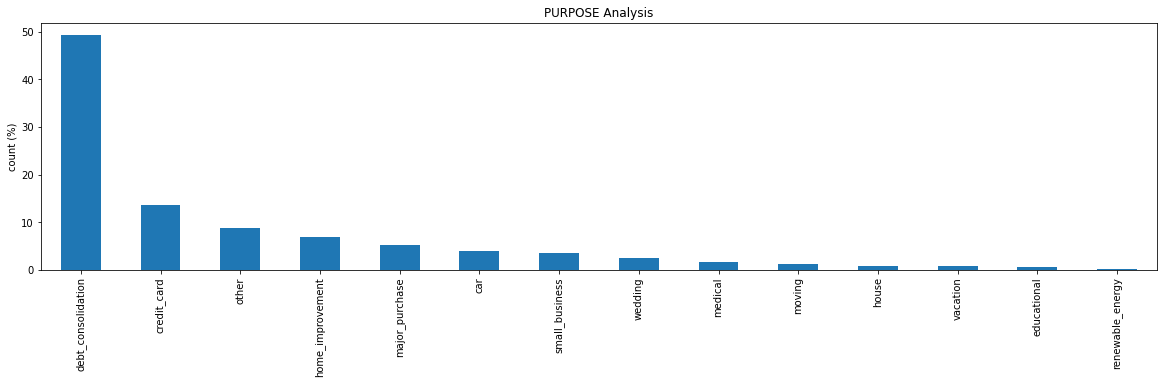

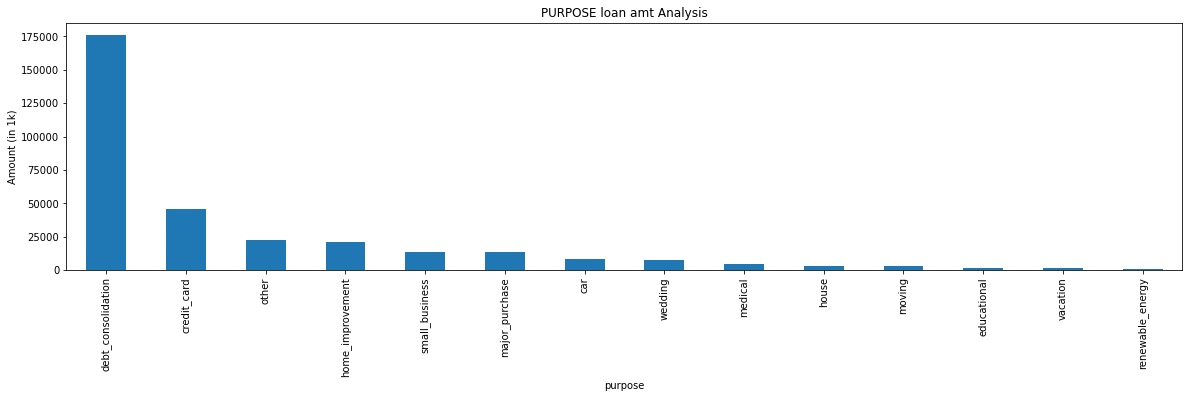

<Figure size 1440x720 with 0 Axes>

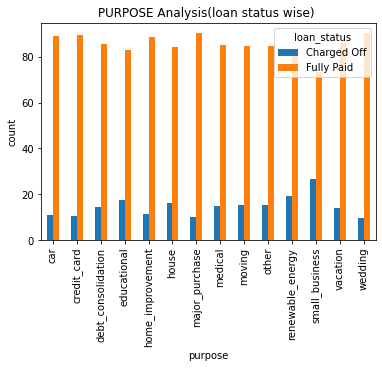

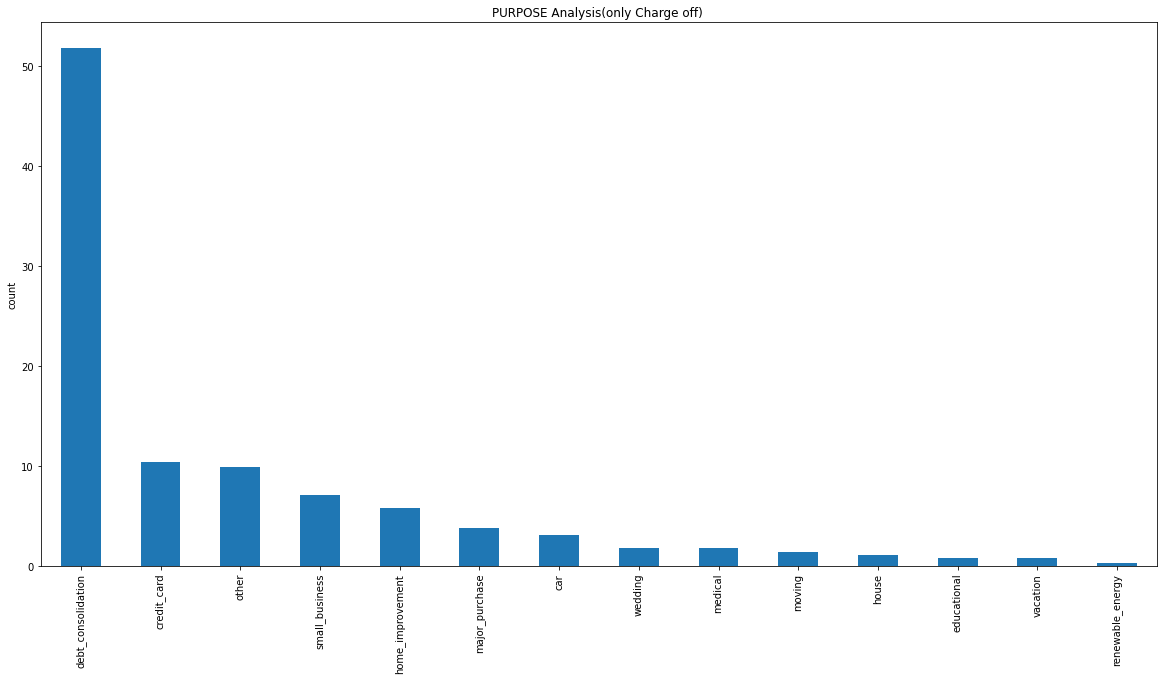

In [47]:
#Purpose field analysis
plot_data(loan,'purpose','d')

Observation of Purpose field analysis
The large loan number is taken for the purpose of  debt_consolidation (around 48%) and amount is 176209.700
major defaulter of debt_consolidation around 52% of total defaulter


			 				TERM Analysis 

total Count 

 36 months    22341
 60 months     7414
Name: term, dtype: int64
Percentage data 

 36 months   75.083
 60 months   24.917
Name: term, dtype: float64
Total loan sum

term
 36 months   219891.650
 60 months   102070.100
Name: loan_amnt, dtype: float64


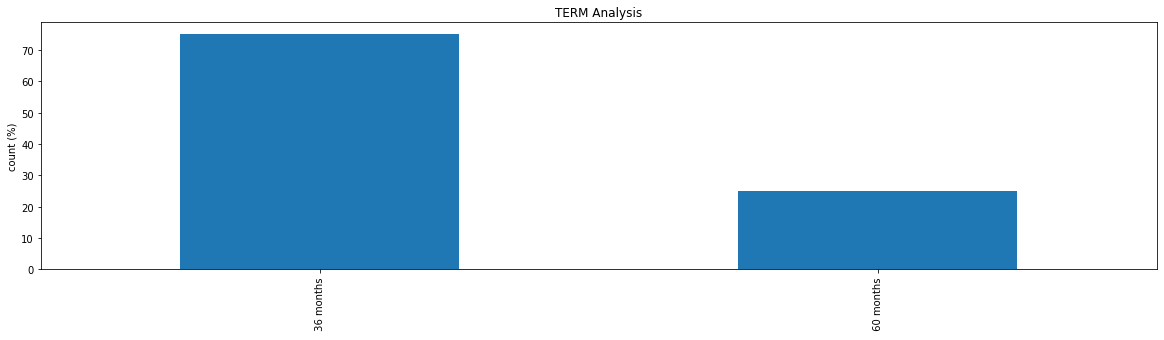

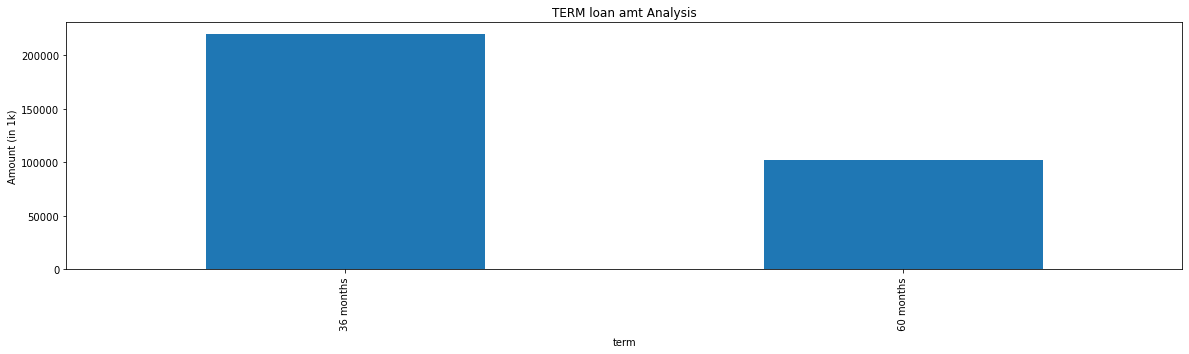

<Figure size 1440x720 with 0 Axes>

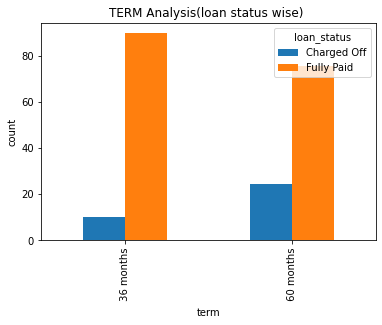

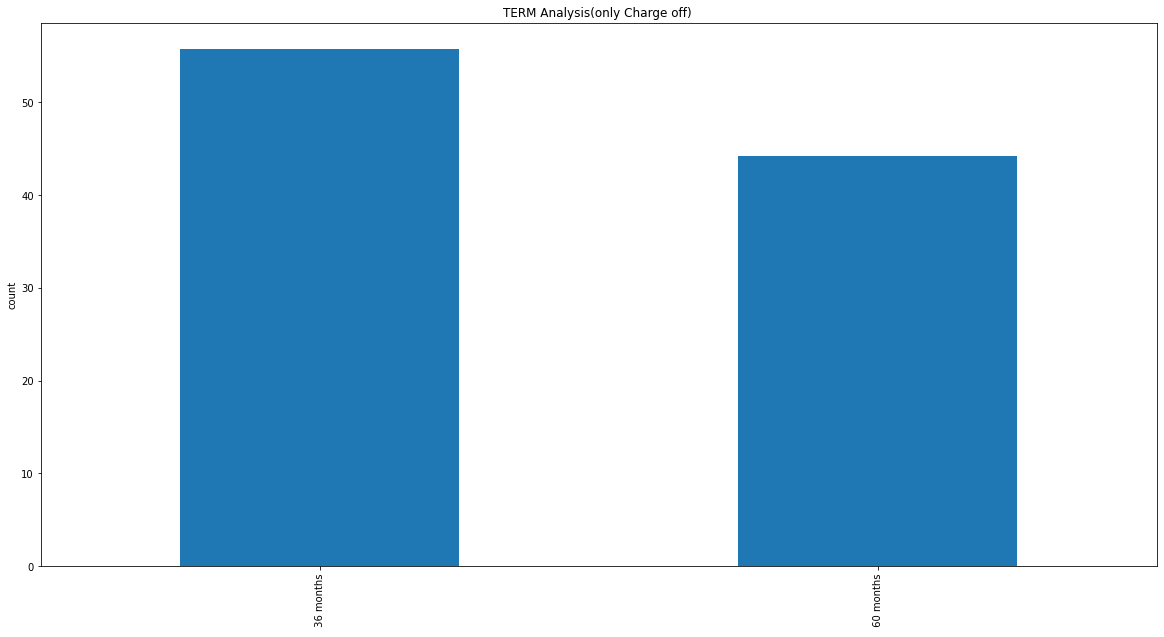

In [48]:
plot_data(loan,'term','d')

Observation of Term field analysis
The large loan number is taken in term of 36months (around 75%) and amount is 219891.650
major defaulter of loand in term of 36months around 55% of total defaulter and another is  around 45%
both percentages are similar so we can remove the Term as  one of the factor for defaulter

			 				GRADE Analysis 

total Count 

B    9097
A    7904
C    6031
D    3938
E    1909
F     674
G     202
Name: grade, dtype: int64
Percentage data 

B   30.573
A   26.564
C   20.269
D   13.235
E    6.416
F    2.265
G    0.679
Name: grade, dtype: float64
Total loan sum

grade
B   99694.400
A   70222.525
C   65714.250
D   46496.150
E   25762.250
F   10517.525
G    3554.650
Name: loan_amnt, dtype: float64


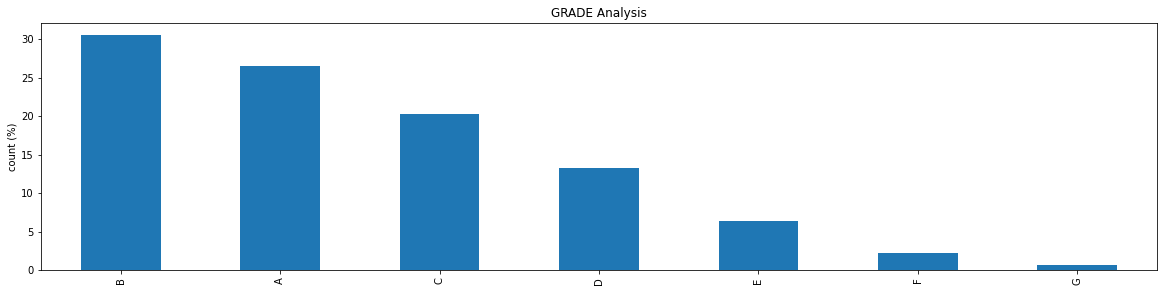

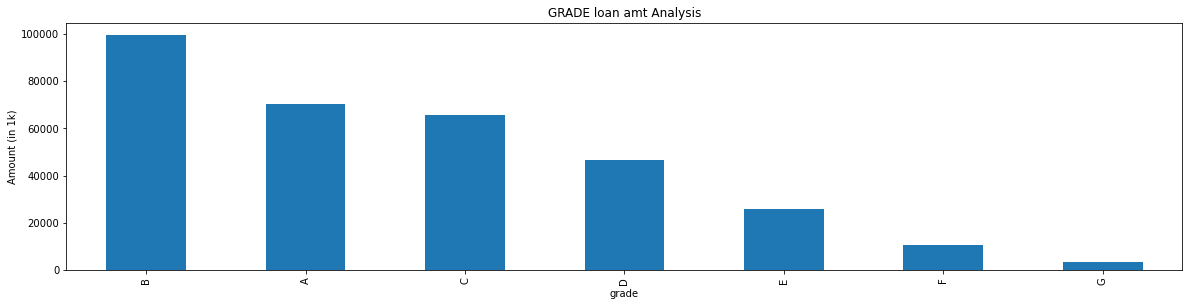

<Figure size 1440x720 with 0 Axes>

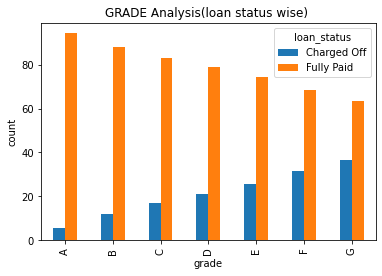

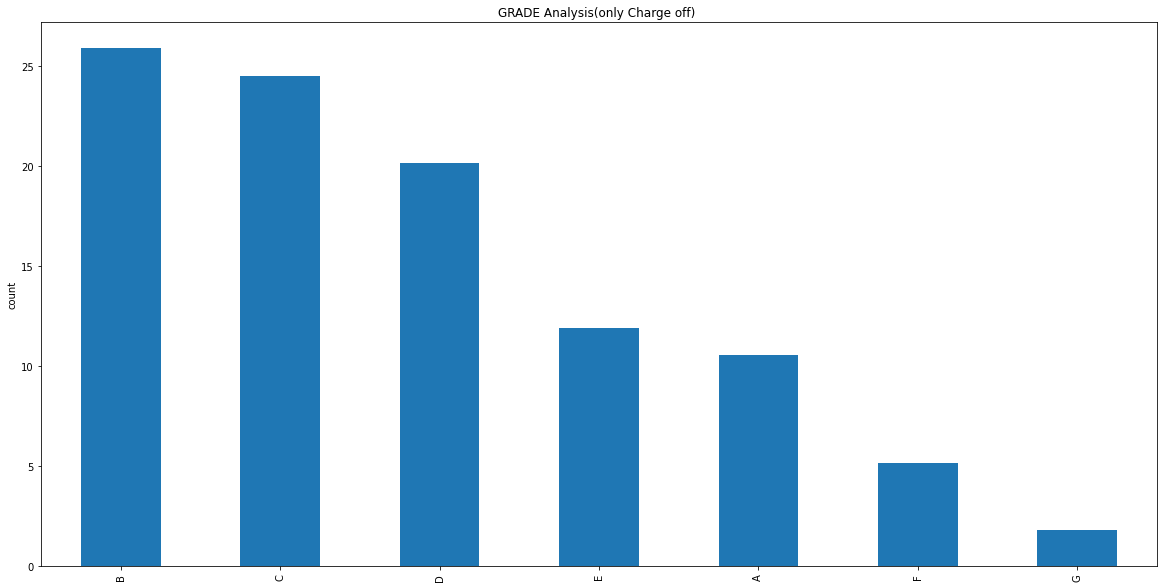

In [49]:
plot_data(loan,'grade','d')

In [ ]:
Observation of Grade field analysis
The large loan number is taken are of grade B (around 75%) and amount is 99694.400
major defaulter of loan are of grade B C D around 67% of total defaulter 


			 				EMP_LENGTH Analysis 

total Count 

10+ years    6700
2 years      3397
3 years      3252
< 1 year     3196
4 years      2722
5 years      2602
1 year       2494
6 years      1779
7 years      1435
8 years      1162
9 years      1016
Name: emp_length, dtype: int64
Percentage data 

10+ years   22.517
2 years     11.417
3 years     10.929
< 1 year    10.741
4 years      9.148
5 years      8.745
1 year       8.382
6 years      5.979
7 years      4.823
8 years      3.905
9 years      3.415
Name: emp_length, dtype: float64
Total loan sum

emp_length
10+ years   79078.400
2 years     34309.450
3 years     34030.225
< 1 year    31526.475
4 years     29225.225
5 years     28068.775
1 year      25481.200
6 years     19639.525
7 years     15944.725
8 years     12722.650
9 years     11935.100
Name: loan_amnt, dtype: float64


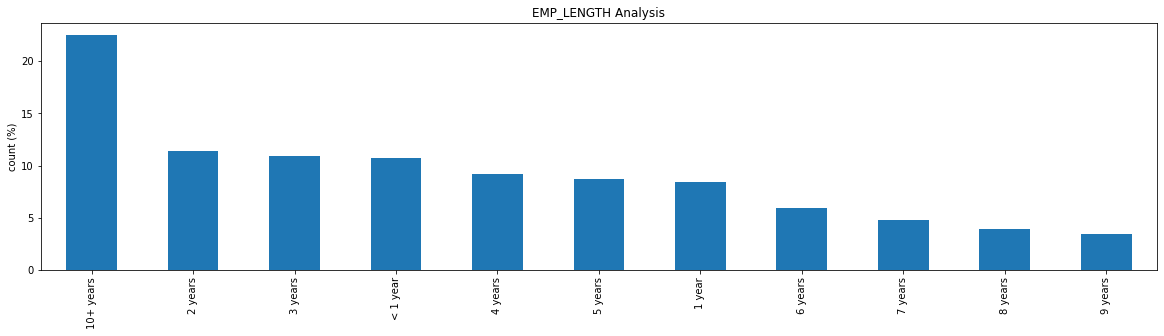

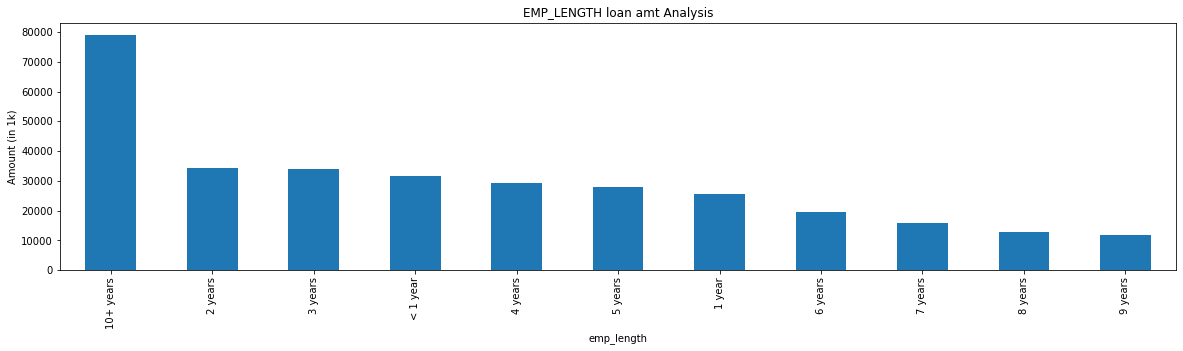

<Figure size 1440x720 with 0 Axes>

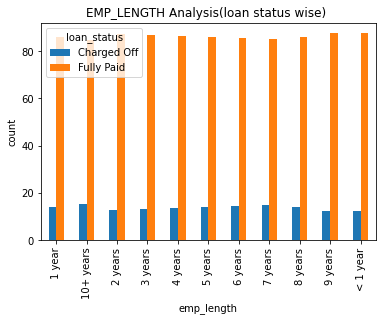

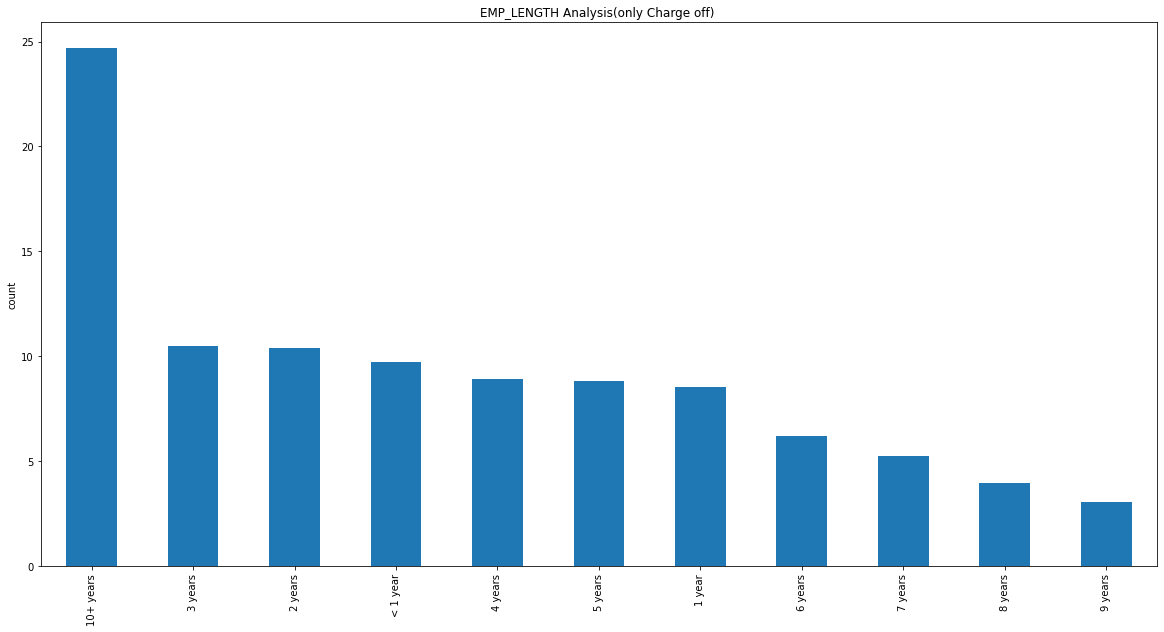

In [50]:
plot_data(loan,'emp_length','d')

Observation of emp_len field analysis
The large loan number is taken by the employpee with 10+experience  ( 22%) and amount is 79078.400
major defaulter of loan are of employmee with experince of 10+year  is 23% of total defaulter 


			 				VERIFICATION_STATUS Analysis 

total Count 

Not Verified       12921
Verified            9133
Source Verified     7701
Name: verification_status, dtype: int64
Percentage data 

Not Verified      43.425
Verified          30.694
Source Verified   25.881
Name: verification_status, dtype: float64
Total loan sum

verification_status
Verified          130037.975
Not Verified      115873.225
Source Verified    76050.550
Name: loan_amnt, dtype: float64


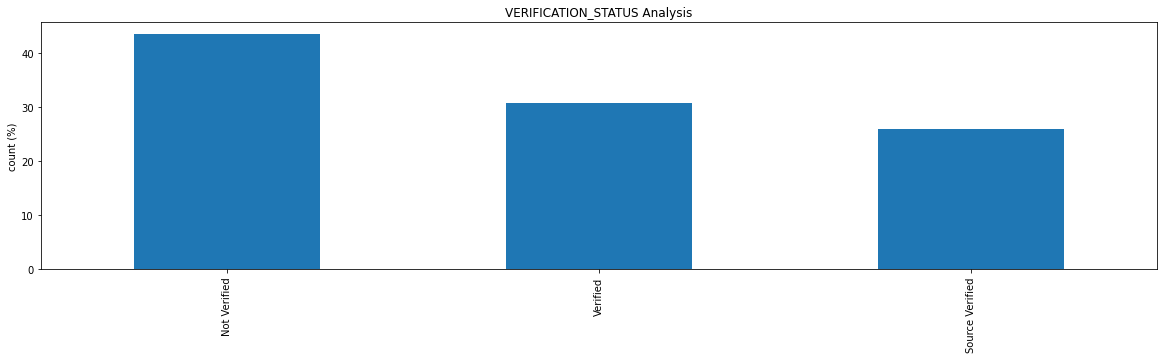

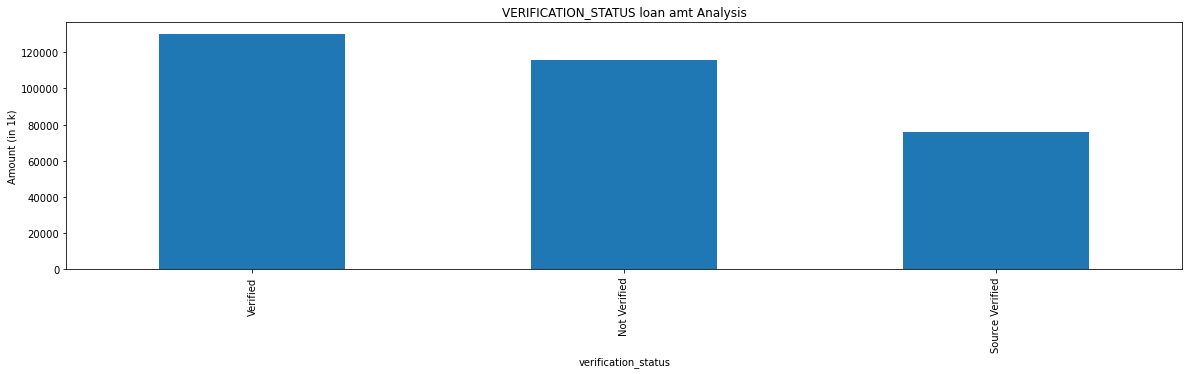

<Figure size 1440x720 with 0 Axes>

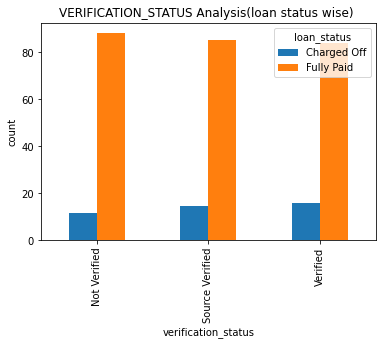

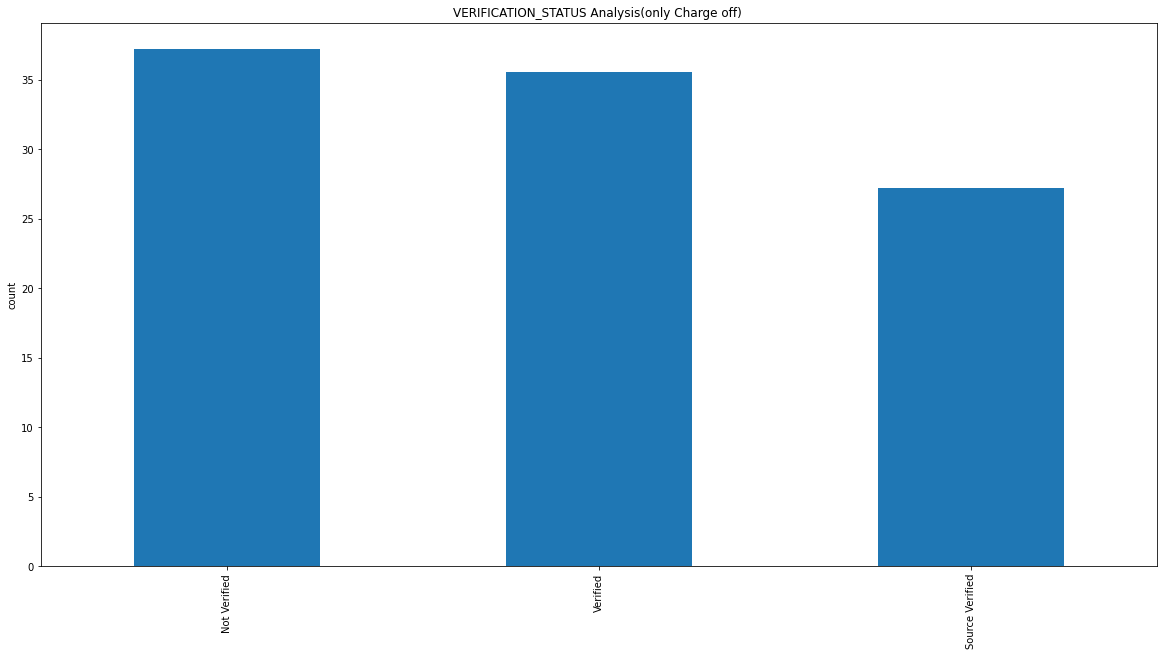

In [51]:
plot_data(loan,'verification_status','d')

Observation of verification_status field analysis
The large loan number is taken by employpee whose income source  not verified by LC  (43%) and amount is 115873.225 .but the amount taken by them is less verified by LC
major defaulter of loan are of employmee whose income source  is verified  is 73% of total defaulter 


			 				HOME_OWNERSHIP Analysis 

total Count 

RENT        14481
MORTGAGE    13176
OWN          2016
OTHER          82
Name: home_ownership, dtype: int64
Percentage data 

RENT       48.667
MORTGAGE   44.282
OWN         6.775
OTHER       0.276
Name: home_ownership, dtype: float64
Total loan sum

home_ownership
MORTGAGE   151929.200
RENT       148042.600
OWN         21068.025
OTHER         921.925
Name: loan_amnt, dtype: float64


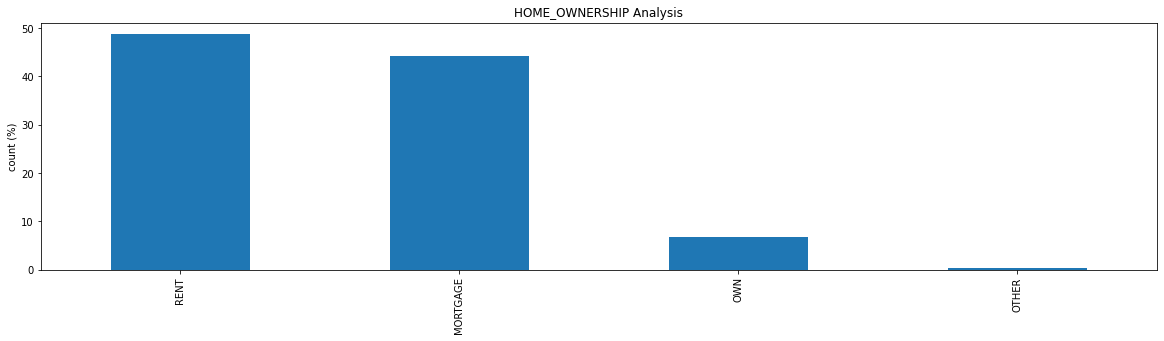

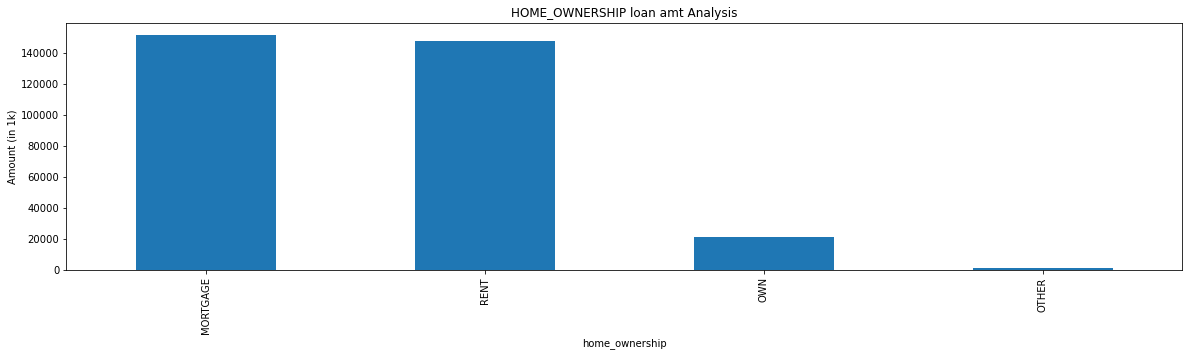

<Figure size 1440x720 with 0 Axes>

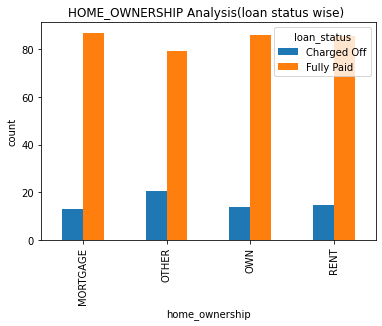

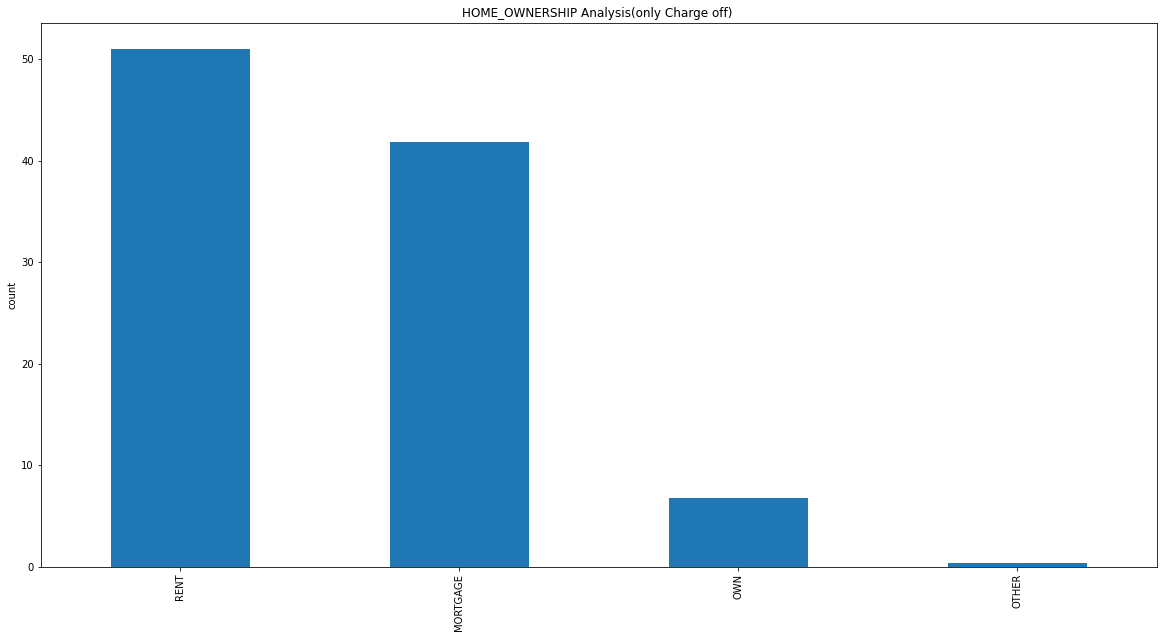

In [52]:
plot_data(loan,'home_ownership','d')

Observation of home_ownership field analysis

Major loan are taken by the employpee with mortage or Rented house .
Based on analysis on Charge_off analysis is  they are major  defaulter


			 				ISSUE_YEAR Analysis 

total Count 

2011    15700
2010     9338
2009     3811
2008      900
2007        6
Name: issue_year, dtype: int64
Percentage data 

2011   52.764
2010   31.383
2009   12.808
2008    3.025
2007    0.020
Name: issue_year, dtype: float64
Total loan sum

issue_year
2011   170214.875
2010   104419.050
2009    39077.825
2008     8193.375
2007       56.625
Name: loan_amnt, dtype: float64


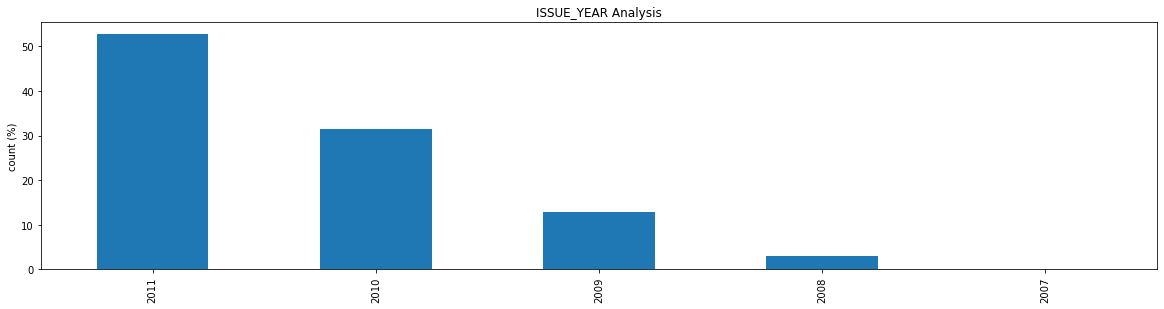

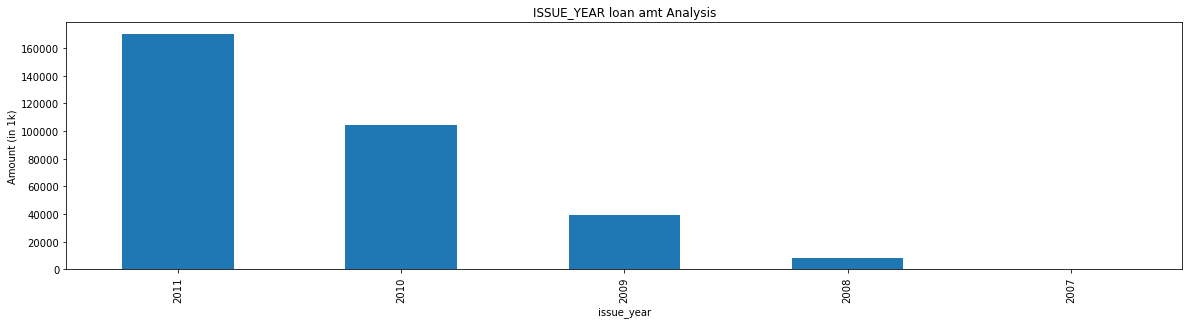

<Figure size 1440x720 with 0 Axes>

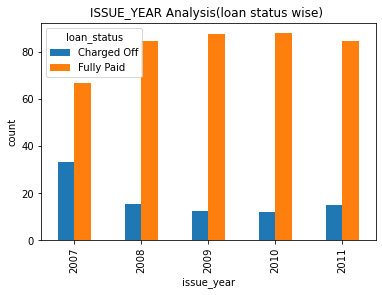

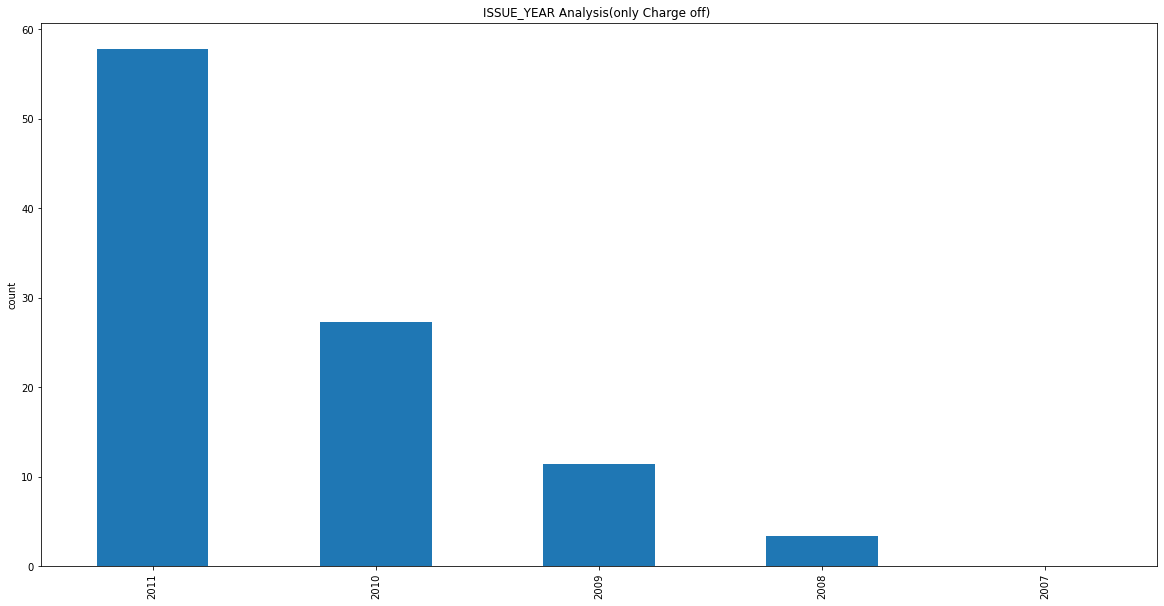

In [53]:
plot_data(loan,'issue_year','d')

 There is  increase in loan taken with the year

			 				ISSUE_MONTH Analysis 

total Count 

12    3278
11    3068
10    2850
8     2675
9     2670
7     2628
6     2435
5     2332
4     2249
3     2026
1     1804
2     1740
Name: issue_month, dtype: int64
Percentage data 

12   11.017
11   10.311
10    9.578
8     8.990
9     8.973
7     8.832
6     8.183
5     7.837
4     7.558
3     6.809
1     6.063
2     5.848
Name: issue_month, dtype: float64
Total loan sum

issue_month
12   38551.800
11   34312.125
10   31260.375
9    28705.550
8    28447.100
7    27075.125
6    24955.600
5    24695.625
4    23506.250
3    21438.150
1    20170.525
2    18843.525
Name: loan_amnt, dtype: float64


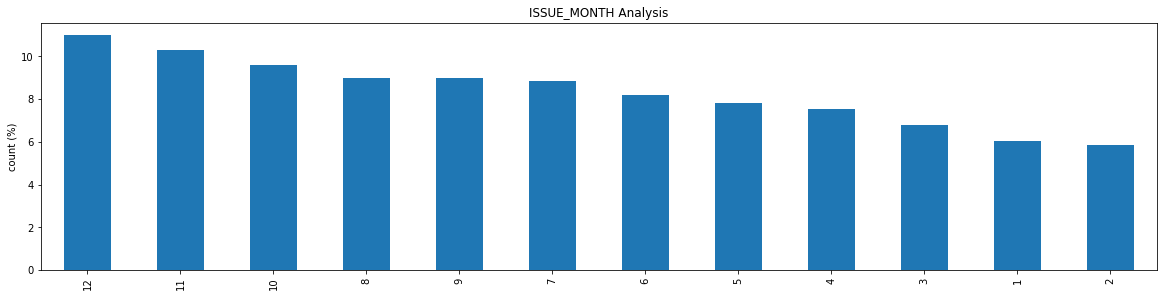

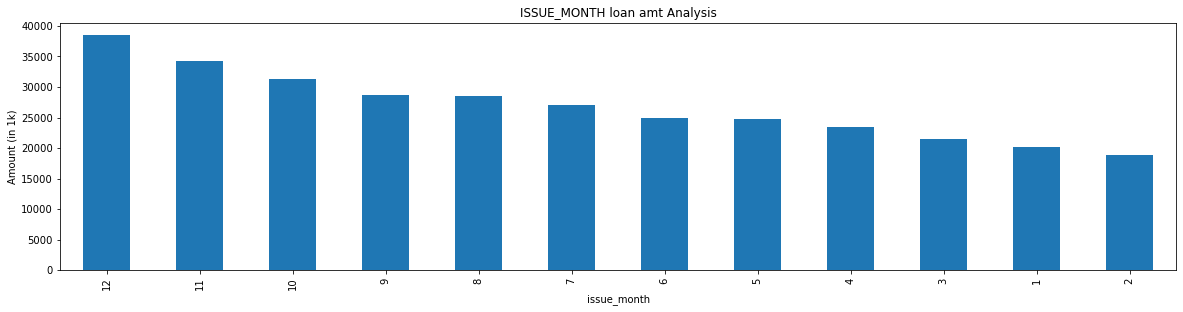

<Figure size 1440x720 with 0 Axes>

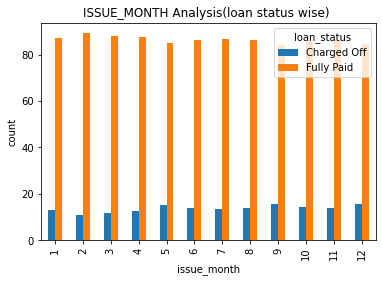

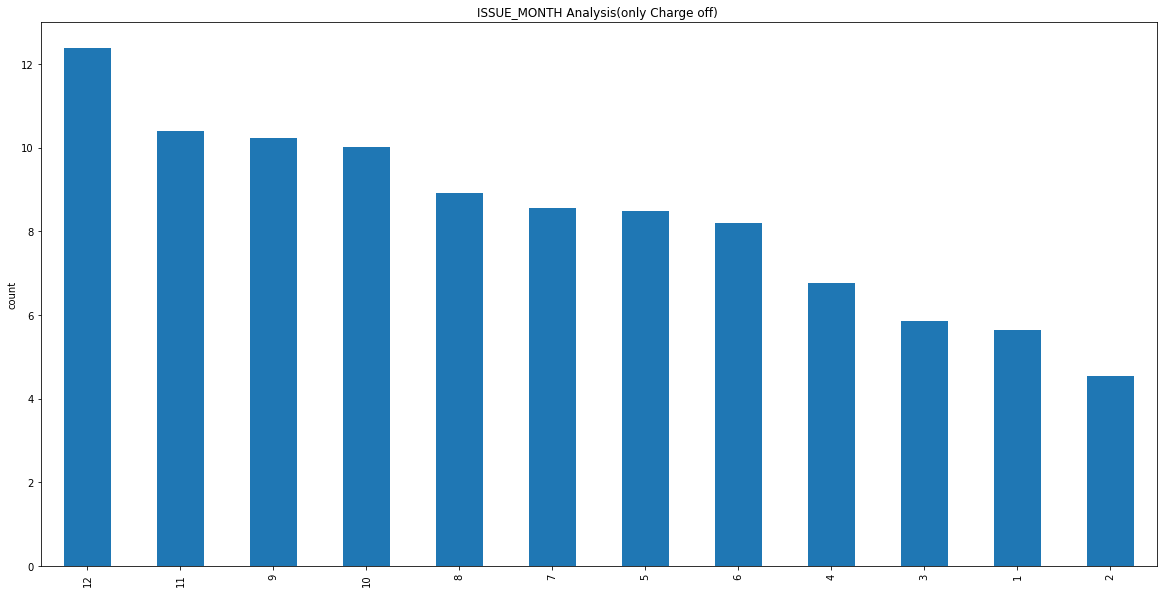

In [54]:
plot_data(loan,'issue_month','d')

			 				INT_RATE Analysis 

                count   mean   std   min    25%    50%    75%    max
loan_status                                                         
Charged Off  4113.000 13.781 3.566 5.420 11.360 13.610 16.320 24.400
Fully Paid  25642.000 11.546 3.545 5.420  8.490 11.490 13.980 24.110

Median of the int_rate variable 
 loan_status
Charged Off   13.610
Fully Paid    11.490
Name: int_rate, dtype: float64


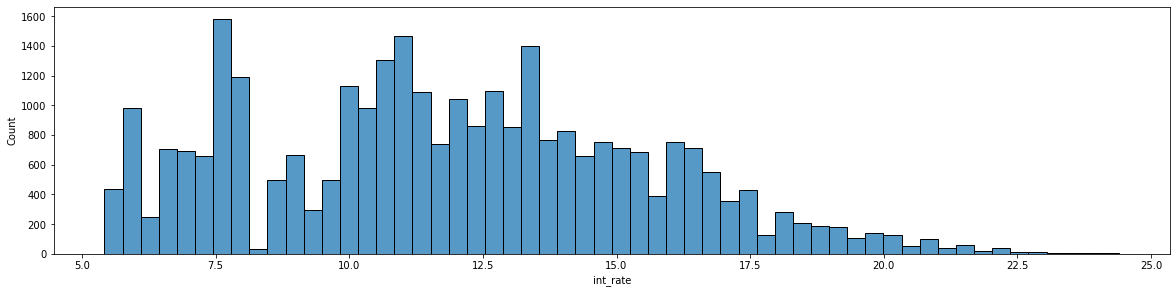

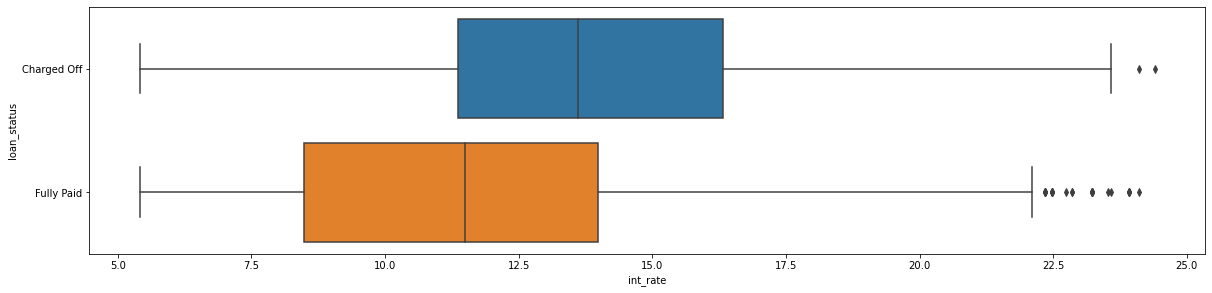

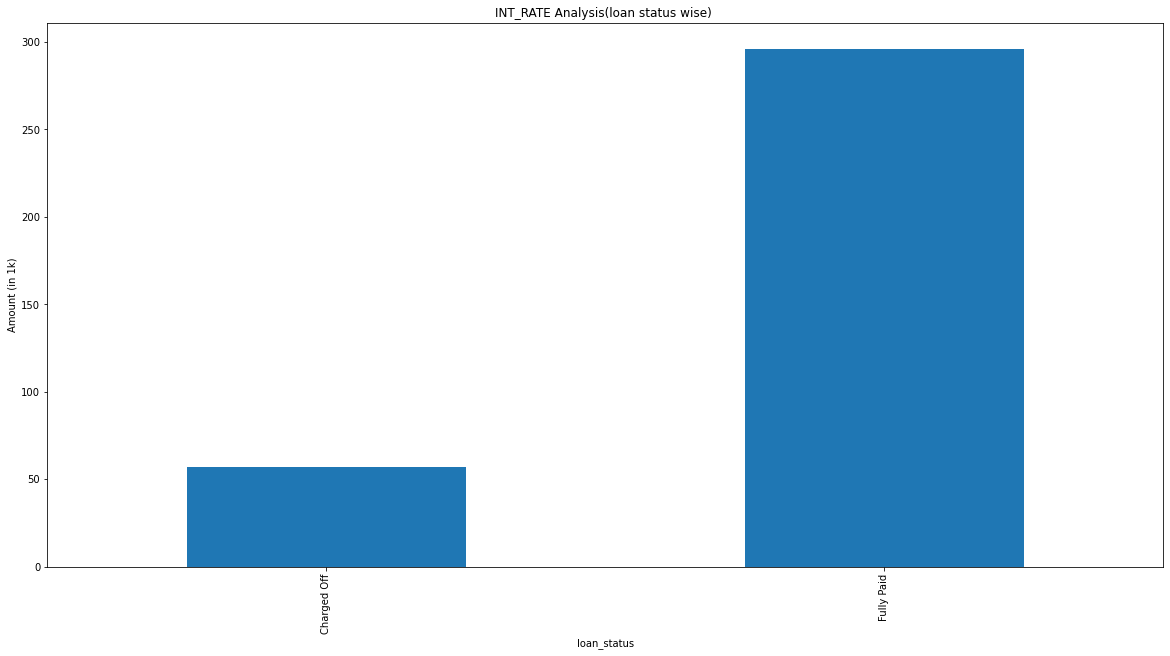

In [55]:

plot_data(loan,'int_rate','n')

			 				OPEN_ACC Analysis 

                count  mean   std   min   25%   50%    75%    max
loan_status                                                      
Charged Off  4113.000 9.422 4.445 2.000 6.000 9.000 12.000 38.000
Fully Paid  25642.000 9.377 4.298 2.000 6.000 9.000 12.000 44.000

Median of the open_acc variable 
 loan_status
Charged Off    9
Fully Paid     9
Name: open_acc, dtype: int64


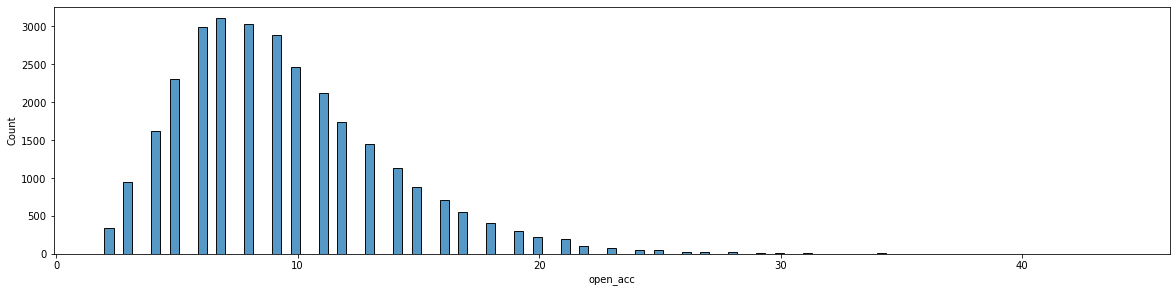

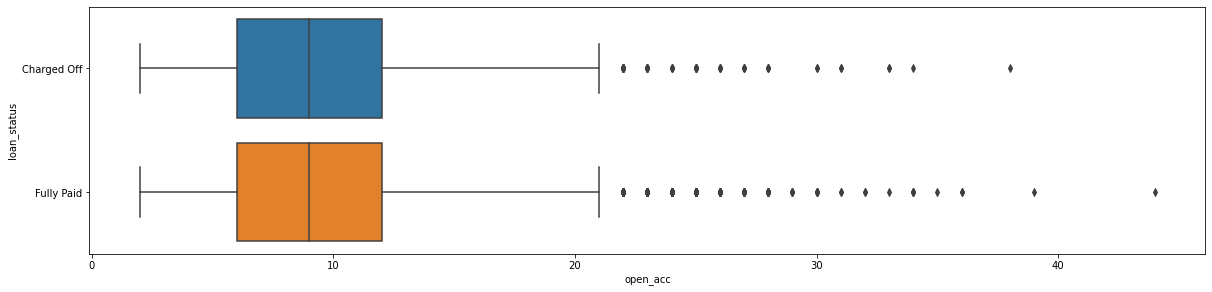

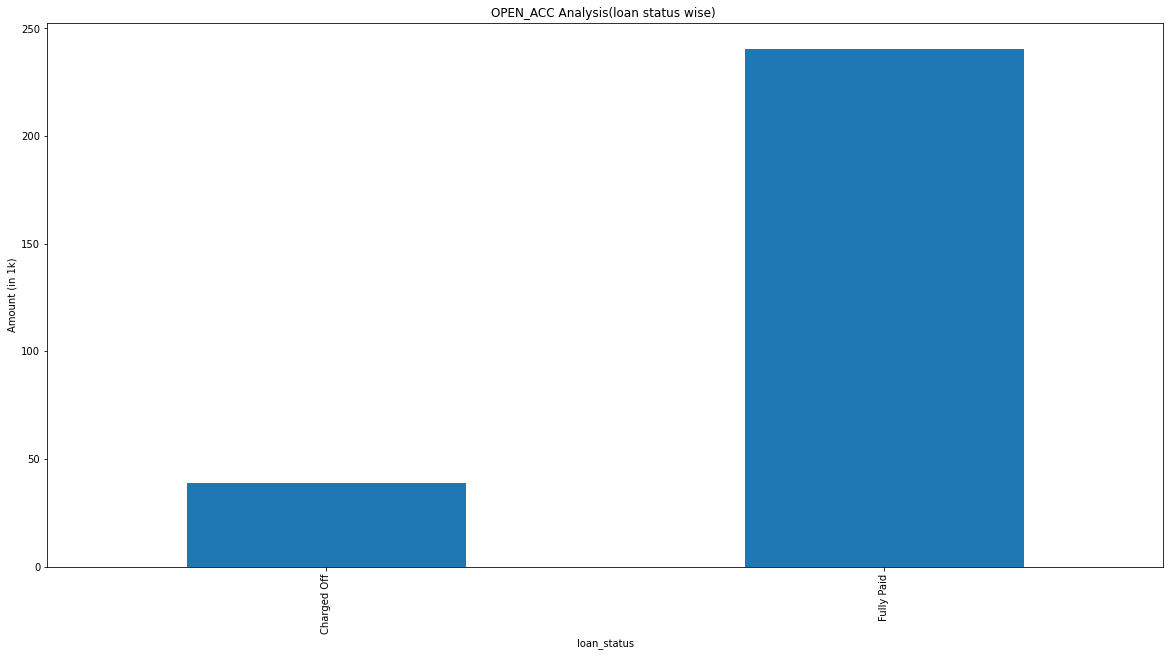

In [69]:
plot_data(loan,'open_acc','n')

The no of open account is similar for the both the loan status .
It cant be factor influceing the defaulter

			 				LOAN_AMNT Analysis 

                count      mean      std      min      25%       50%  \
loan_status                                                            
Charged Off  4113.000 11682.543 6239.759 2500.000 6250.000 10000.000   
Fully Paid  25642.000 10682.141 5806.438 2500.000 6000.000 10000.000   

                  75%       max  
loan_status                      
Charged Off 16000.000 25000.000  
Fully Paid  14500.000 25000.000  

Median of the loan_amnt variable 
 loan_status
Charged Off    10000
Fully Paid     10000
Name: loan_amnt, dtype: int64


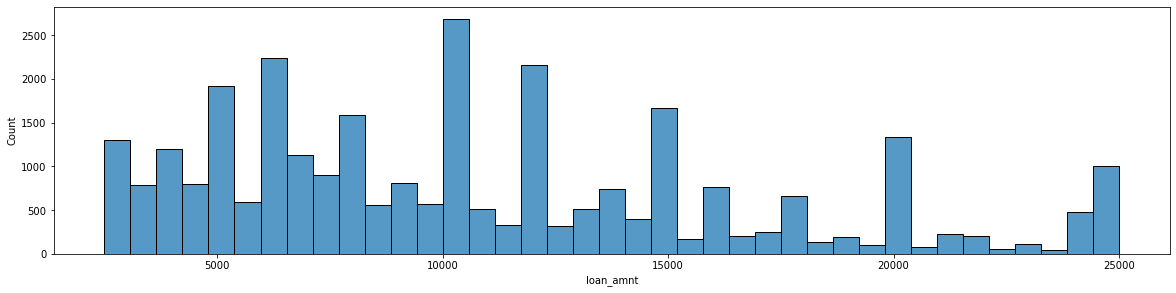

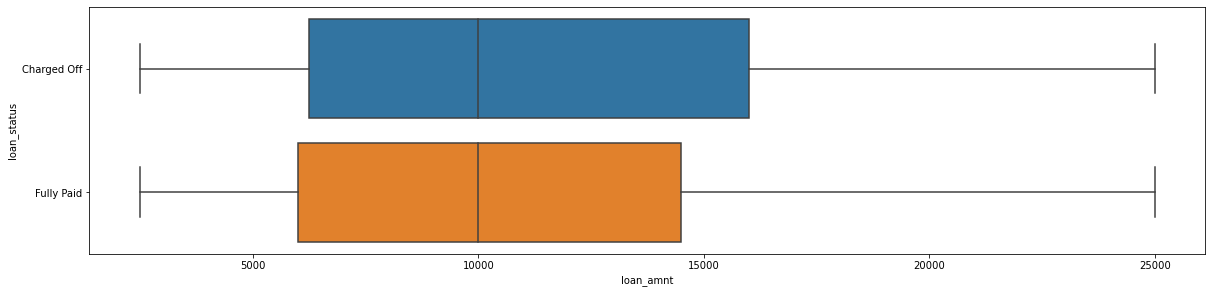

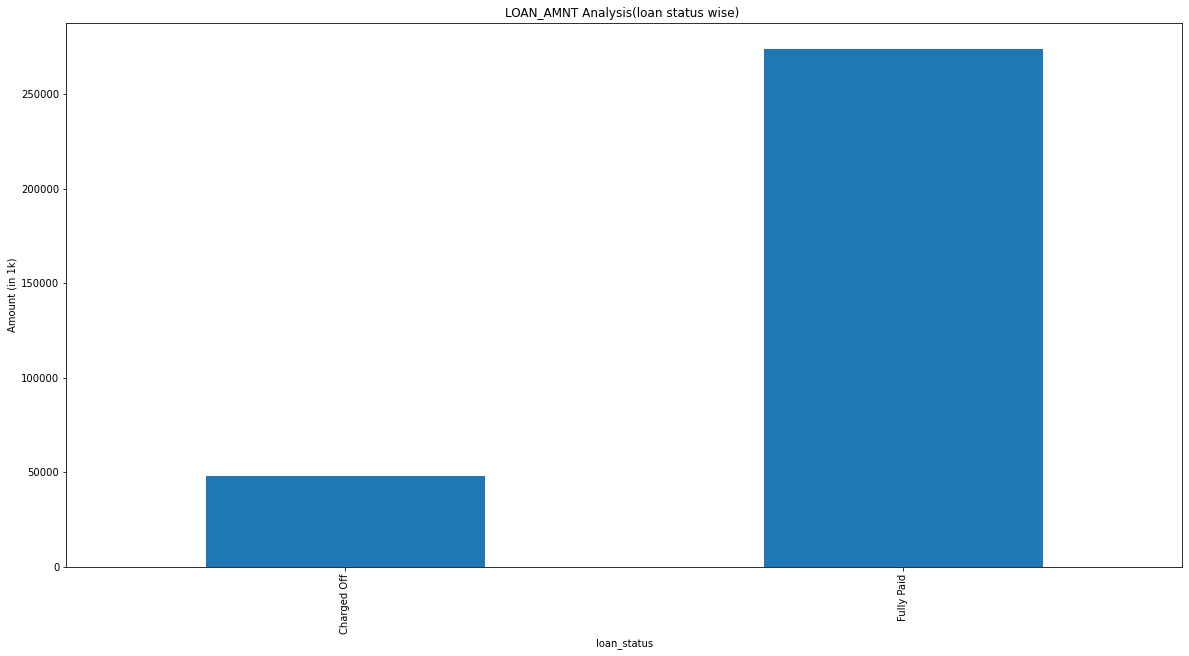

In [57]:
plot_data(loan,'loan_amnt','n')

			 				ANNUAL_INC Analysis 

                count      mean       std       min       25%       50%  \
loan_status                                                               
Charged Off  4113.000 58490.709 24635.929 24000.000 40000.000 54000.000   
Fully Paid  25642.000 63815.864 26327.093 24000.000 43160.000 60000.000   

                  75%        max  
loan_status                       
Charged Off 72000.000 140000.000  
Fully Paid  80000.000 140000.000  

Median of the annual_inc variable 
 loan_status
Charged Off   54000.000
Fully Paid    60000.000
Name: annual_inc, dtype: float64


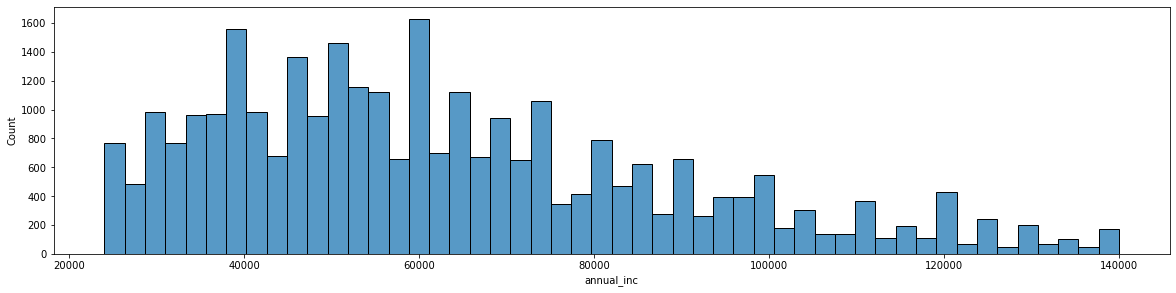

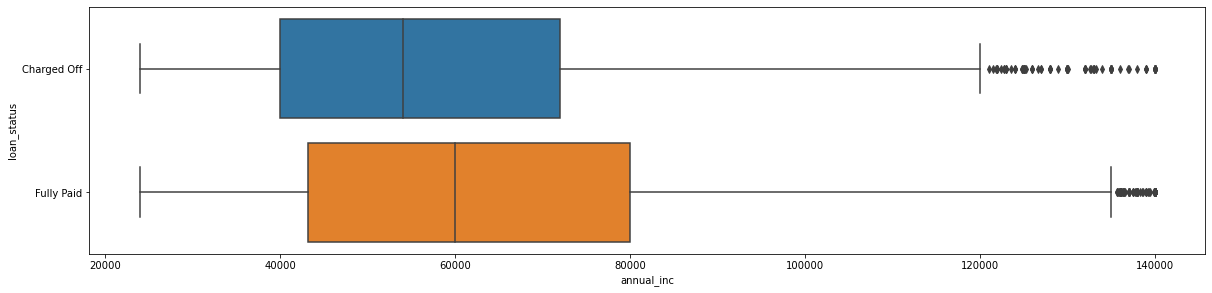

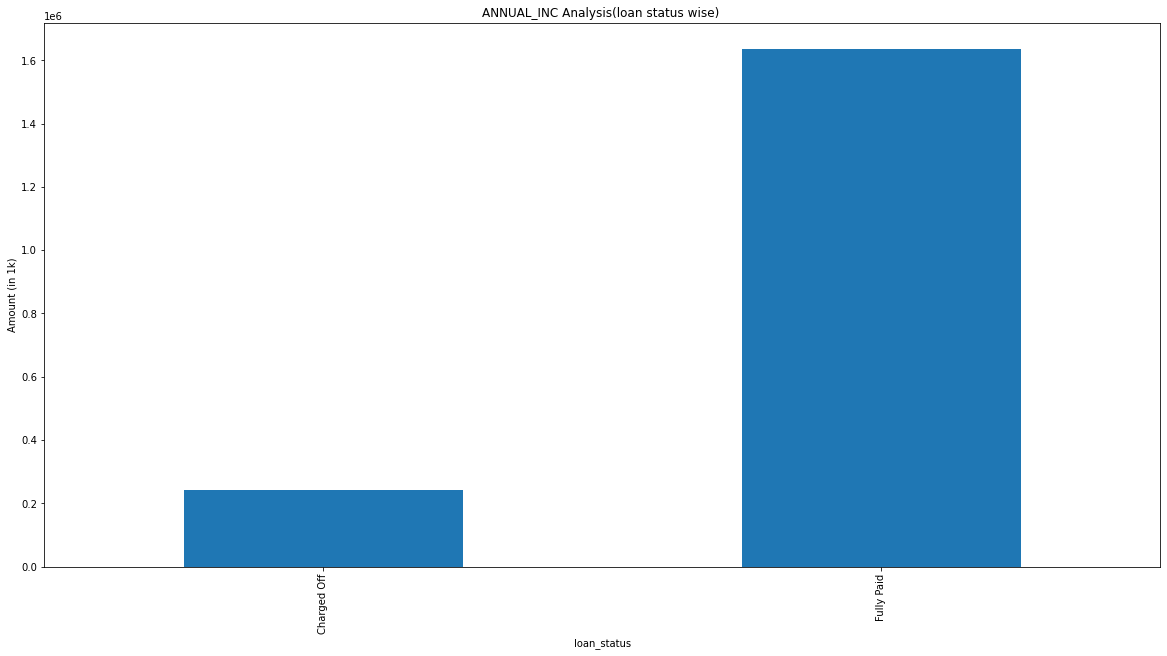

In [58]:
plot_data(loan,'annual_inc','n')

by analysis the box plots of the loan status it show that employpee with less annual income  likely to be default

			 				ADDR_STATE Analysis 

total Count 

CA    5350
NY    2870
FL    2113
TX    2036
NJ    1398
PA    1180
IL    1166
VA    1087
GA    1037
MA    1009
OH     927
MD     816
AZ     629
WA     610
CO     566
NC     566
CT     541
MI     537
MO     529
MN     468
NV     381
SC     353
AL     337
OR     337
WI     320
LA     313
KY     246
OK     231
KS     195
UT     190
AR     185
DC     166
RI     159
NM     138
HI     128
NH     126
WV     124
DE      95
WY      63
AK      60
MT      57
SD      47
VT      40
MS      16
TN       7
ID       3
NE       1
IA       1
IN       1
Name: addr_state, dtype: int64
Percentage data 

CA   17.980
NY    9.645
FL    7.101
TX    6.843
NJ    4.698
PA    3.966
IL    3.919
VA    3.653
GA    3.485
MA    3.391
OH    3.115
MD    2.742
AZ    2.114
WA    2.050
CO    1.902
NC    1.902
CT    1.818
MI    1.805
MO    1.778
MN    1.573
NV    1.280
SC    1.186
AL    1.133
OR    1.133
WI    1.075
LA    1.052
KY    0.827
OK    0.776
KS    0.655
UT    0.639
AR    0.

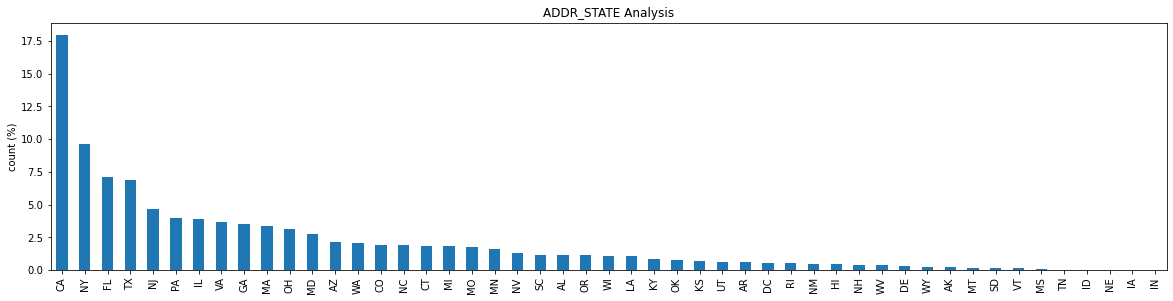

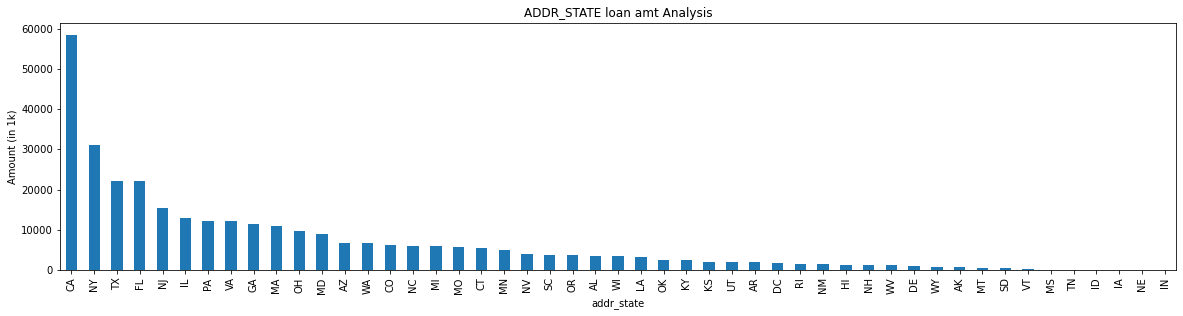

<Figure size 1440x720 with 0 Axes>

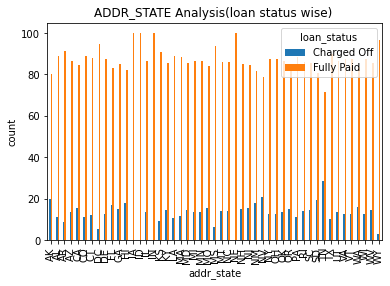

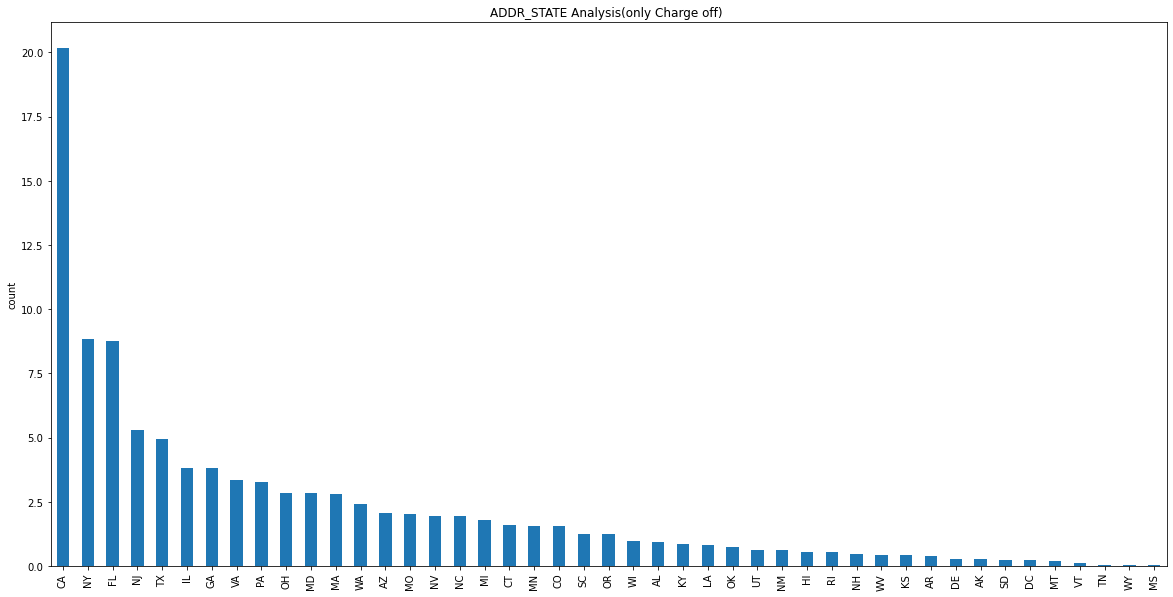

In [75]:
plot_data(loan,'addr_state','d')

There are wide difference in the percentage of the defaulter while analysis the state wise.employpee from CA have a 20% of the total defaulter

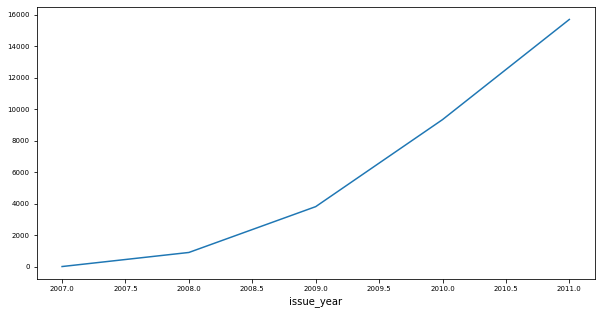

In [59]:
plt.figure(figsize=(10,5))
loan.groupby('issue_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

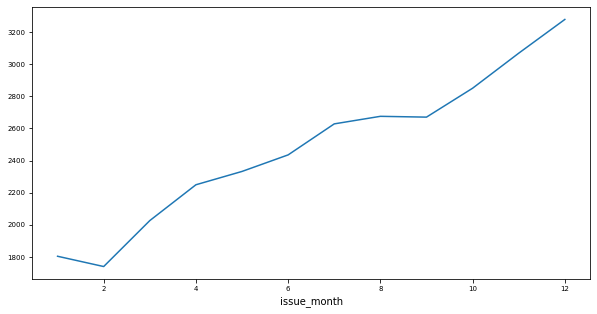

In [60]:
plt.figure(figsize=(10,5))
loan.groupby('issue_month').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

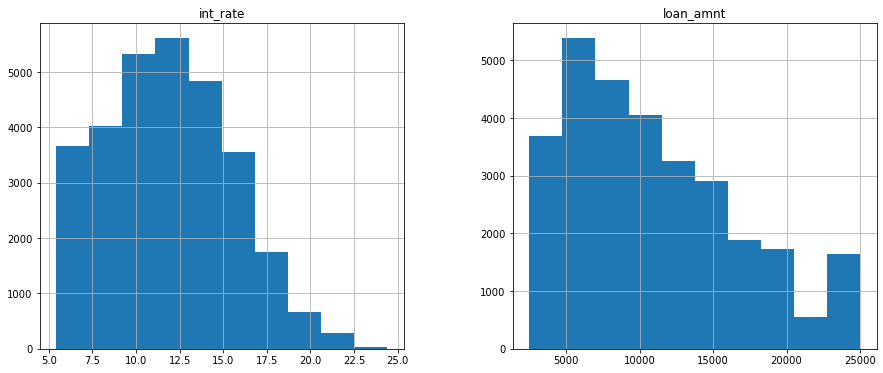

In [61]:
#sns.jointplot('int_rate', 'loan_amnt', loan,bins=20)

loan.hist(column=['int_rate', 'loan_amnt'], figsize=(15,6))
plt.show()

When the int rate is 8-13% the number of loans takens is more 

In [71]:
loan[loan['loan_status']=='Charged Off'].groupby('open_acc')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
open_acc,,,,,,,,
2,60.000,48572.844,19767.901,24000.000,32415.000,42900.000,60250.000,105000.000
3,148.000,47868.694,20236.215,24000.000,35000.000,45000.000,53250.000,130000.000
4,232.000,49700.846,20617.186,24000.000,35003.000,44700.000,60000.000,124000.000
5,289.000,50006.162,23389.104,24000.000,34000.000,44828.000,60204.000,140000.000
6,396.000,51619.763,21401.830,24000.000,35751.000,45000.000,63000.000,137004.000
7,417.000,54676.493,21940.934,24000.000,38000.000,51000.000,65000.000,140000.000
8,418.000,57614.592,22956.880,24000.000,40850.000,52062.000,70000.000,138996.000
9,395.000,60816.517,24901.578,24000.000,42050.000,55500.000,73850.000,140000.000
10,363.000,60177.440,23957.441,24996.000,41260.000,55900.000,73000.000,140000.000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


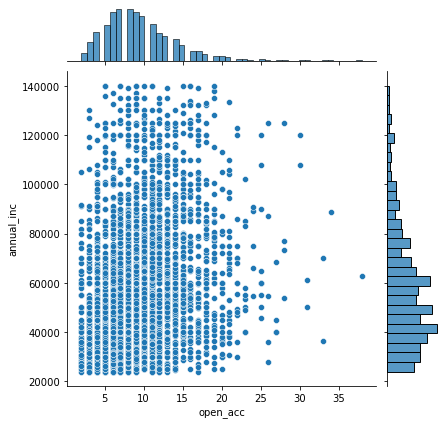

In [70]:
sns.jointplot('open_acc', 'annual_inc', loan[loan['loan_status']=='Charged Off'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


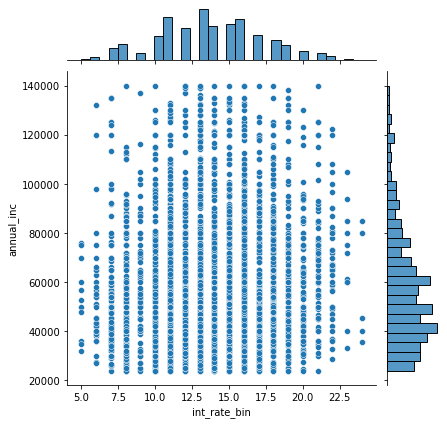

In [74]:
sns.jointplot('int_rate_bin', 'annual_inc', loan[loan['loan_status']=='Charged Off'])
plt.show()

the employpee with less annule income whom taken loan with 12-15% int rate have more likely to be defaulter

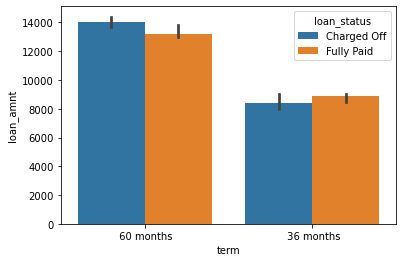

In [64]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.median)
plt.show()

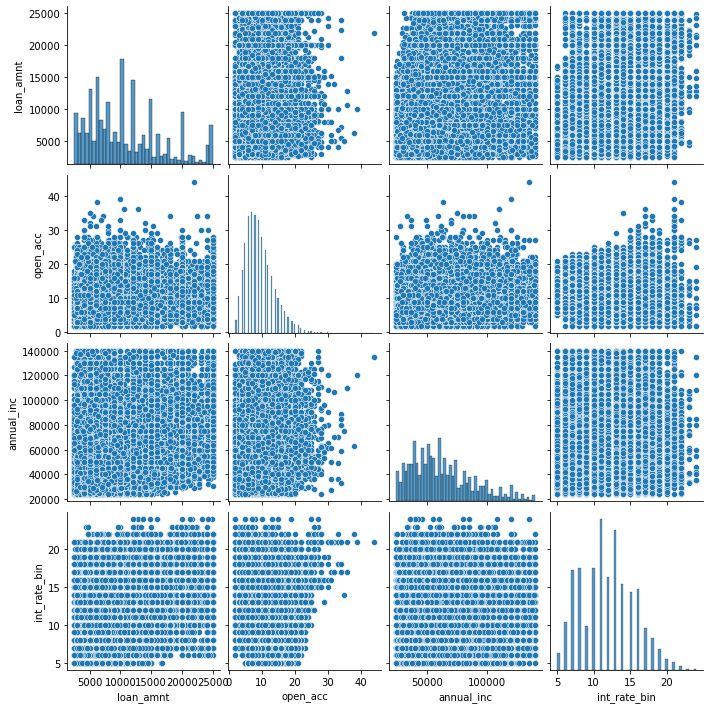

In [65]:
sns.pairplot(loan[['loan_amnt', 'open_acc', 'loan_status','verification_status','purpose','annual_inc','int_rate_bin']])
plt.show()